In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

Importação da planilha com os dados


In [ ]:
df = pd.read_csv("dados", sep=";")

#Filtragem
df = df[df['time'].str.contains("SET")]
df = df[df['protocol'].str.contains("UPIP")]
df = df[df['drug_class'].str.contains("macrolide antibiotic")]


In [ ]:
#Criar uma tabela de contingência
df_reset = df.reset_index()
df_grouped = df.groupby(['name', 'gene_family'])['num_reads'].sum().unstack(fill_value=0)

#Obter o perentual
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
df_percent = df_percent.T
df_percent = df_percent[df_percent.columns[df_percent.columns.str.endswith('UPIP')]]

#Exportar em formato csv
df_percent.to_csv("teste.csv", sep=";", index=False)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Plotagem do gráfico

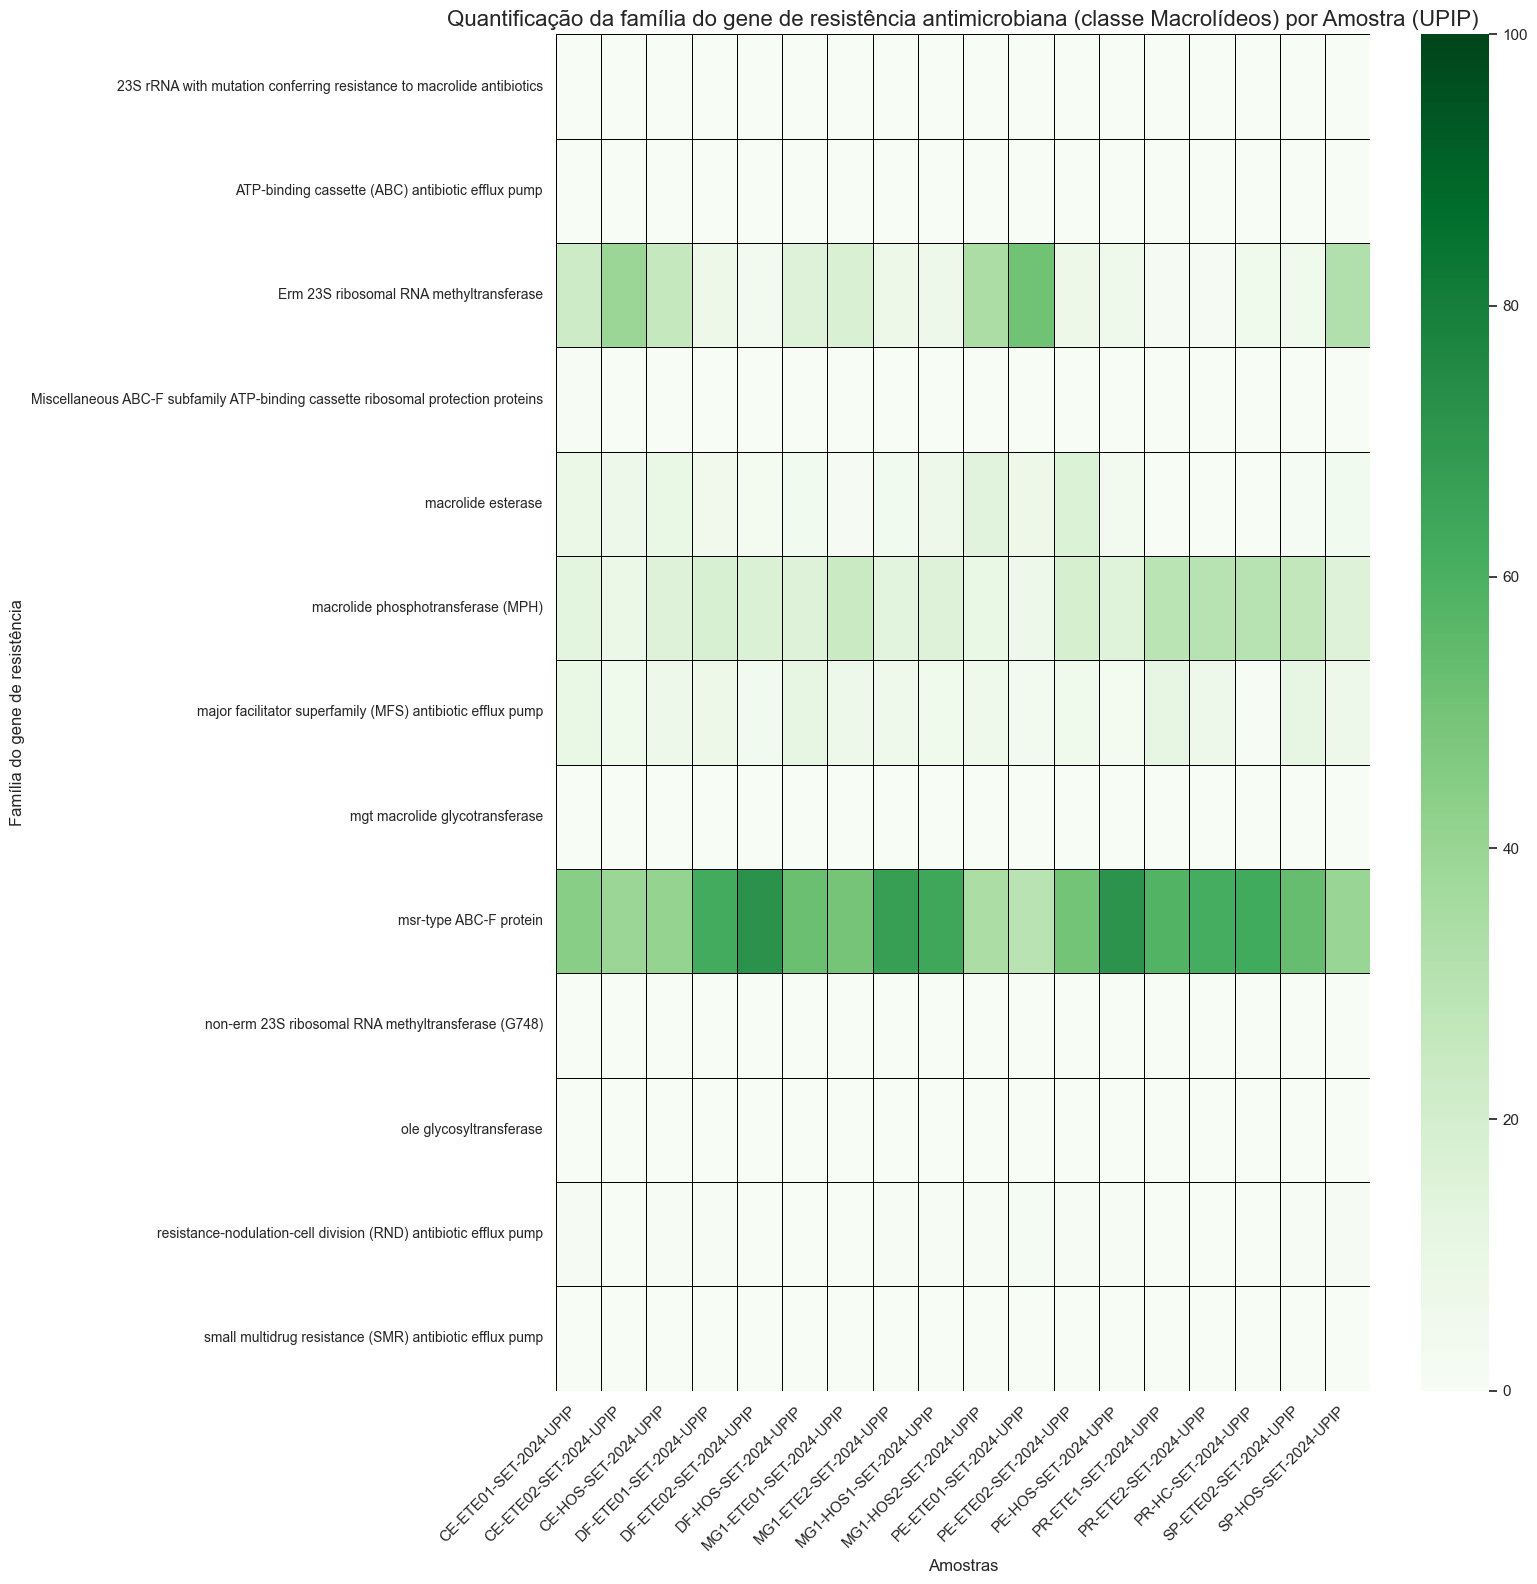

In [77]:
plt.figure(figsize=(16, 16)) 
sns.set(style="whitegrid")

ax = sns.heatmap(df_percent, cmap="Greens", annot=False, cbar=True, linewidths=0.5, linecolor='black', 
                 vmax=100, vmin=0)

ax.set_title("Quantificação da família do gene de resistência antimicrobiana (classe Macrolídeos) por Amostra (UPIP)", fontsize=16)
plt.xlabel("Amostras", fontsize=12)
plt.ylabel("Família do gene de resistência", fontsize=12)
plt.xticks(rotation=45, ha='right')

ax.set_yticks(np.arange(len(df_percent.index)) + 0.5) 
ax.set_yticklabels(df_percent.index, rotation=0, fontsize=10)

plt.subplots_adjust(left=0.25) 

plt.tight_layout()
plt.savefig("heatmap_gene_macrolide_upip.jpg", format="jpg", dpi=600)
plt.show()